In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector

In [77]:
#connect to server
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
con=mysql.connector.connect(
    host="localhost" ,
    port=3306,
    user="root",
    password="Joshi@12345",
    database="empdb",)

import warnings
warnings.filterwarnings('ignore')


df = pd.read_sql_query("select * from studentmarks",con)
df
df.head(10)

,name,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
0,Name,Gende,0,0,0,0,0,0,0,0,0
1,John,M,5,55,45,56,87,21,52,89,65
2,Suresh,M,4,75,96,78,64,90,61,58,2
3,Ramesh,M,25,25,54,89,76,95,87,56,74
4,Jessica,F,12,78,96,86,63,54,89,75,45
5,Jennifer,F,2,58,96,78,46,96,77,83,53
6,Annu,F,5,45,87,52,89,55,89,87,52
7,pooja,F,4,55,64,61,58,75,58,64,61
8,Ritesh,M,25,54,76,87,56,25,56,76,87
9,Farha,F,12,55,63,89,75,78,75,63,89


In [44]:
#lets drop unwanted rows and column
df.drop([0,],inplace=True)

In [45]:
df

,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics
1,M,5,55,45,56,87,21,52,89,65
2,M,4,75,96,78,64,90,61,58,2
3,M,25,25,54,89,76,95,87,56,74
4,F,12,78,96,86,63,54,89,75,45
5,F,2,58,96,78,46,96,77,83,53
6,F,5,45,87,52,89,55,89,87,52
7,F,4,55,64,61,58,75,58,64,61
8,M,25,54,76,87,56,25,56,76,87
9,F,12,55,63,89,75,78,75,63,89
10,M,2,96,46,77,83,58,83,46,77


In [46]:
#lets check null values
df.isnull().sum()

gender       0
dob          0
maths        0
physics      0
chemistry    0
english      0
biology      0
economics    0
history      0
civics       0
dtype: int64

In [47]:
#lets check how many males and females are in the dataset
df['gender'].count

<bound method Series.count of 1     M
2     M
3     M
4     F
5     F
6     F
7     F
8     M
9     F
10    M
Name: gender, dtype: object>

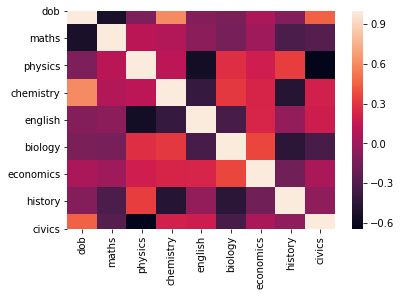

In [48]:
#lets check correlation with heatmap
sns.heatmap(df.corr())

In [49]:
#lets check min,max in maths
print(df['maths'].min())
print(df['maths'].max())

25
96


In [52]:
#lets convert this gender column into numeric
gender = pd.get_dummies(df['gender'],drop_first=True)

In [53]:
#lets concat gender column
df = pd.concat([df,gender],axis=1)
df

,gender,dob,maths,physics,chemistry,english,biology,economics,history,civics,M
1,M,5,55,45,56,87,21,52,89,65,1
2,M,4,75,96,78,64,90,61,58,2,1
3,M,25,25,54,89,76,95,87,56,74,1
4,F,12,78,96,86,63,54,89,75,45,0
5,F,2,58,96,78,46,96,77,83,53,0
6,F,5,45,87,52,89,55,89,87,52,0
7,F,4,55,64,61,58,75,58,64,61,0
8,M,25,54,76,87,56,25,56,76,87,1
9,F,12,55,63,89,75,78,75,63,89,0
10,M,2,96,46,77,83,58,83,46,77,1


In [55]:
#lets drop gender column again
df.drop(['gender'],axis=1,inplace=True)
df

,dob,maths,physics,chemistry,english,biology,economics,history,civics,M
1,5,55,45,56,87,21,52,89,65,1
2,4,75,96,78,64,90,61,58,2,1
3,25,25,54,89,76,95,87,56,74,1
4,12,78,96,86,63,54,89,75,45,0
5,2,58,96,78,46,96,77,83,53,0
6,5,45,87,52,89,55,89,87,52,0
7,4,55,64,61,58,75,58,64,61,0
8,25,54,76,87,56,25,56,76,87,1
9,12,55,63,89,75,78,75,63,89,0
10,2,96,46,77,83,58,83,46,77,1


In [56]:
#also date of birth also dont show importance related to marks so we will drop it as well
df.drop(['dob'],axis=1,inplace=True)
df

,maths,physics,chemistry,english,biology,economics,history,civics,M
1,55,45,56,87,21,52,89,65,1
2,75,96,78,64,90,61,58,2,1
3,25,54,89,76,95,87,56,74,1
4,78,96,86,63,54,89,75,45,0
5,58,96,78,46,96,77,83,53,0
6,45,87,52,89,55,89,87,52,0
7,55,64,61,58,75,58,64,61,0
8,54,76,87,56,25,56,76,87,1
9,55,63,89,75,78,75,63,89,0
10,96,46,77,83,58,83,46,77,1


<function matplotlib.pyplot.show(*args, **kw)>

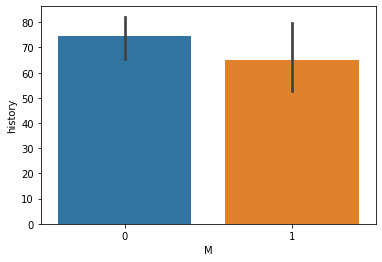

In [61]:
#lets see how many boys and girls perform in history subject
sns.barplot(x='M',y='history',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

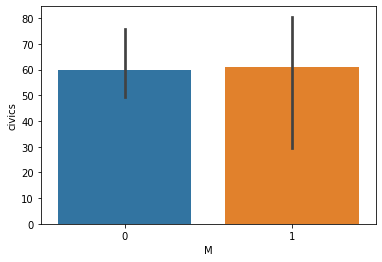

In [62]:
#lets see how many boys and girls perform in civics subject
sns.barplot(x='M',y='civics',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

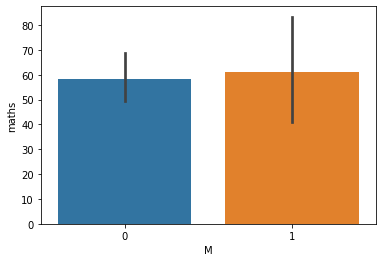

In [63]:
#lets see how many boys and girls perform in maths subject
sns.barplot(x='M',y='maths',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

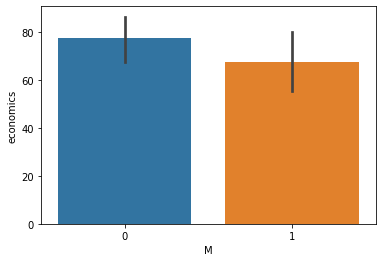

In [64]:
#lets see how many boys and girls perform in economics subject
sns.barplot(x='M',y='economics',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

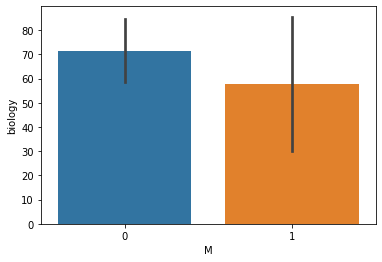

In [65]:
#lets see how many boys and girls perform in biology subject
sns.barplot(x='M',y='biology',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

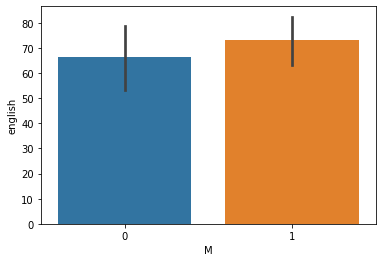

In [66]:
#lets see how many boys and girls perform in english subject
sns.barplot(x='M',y='english',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

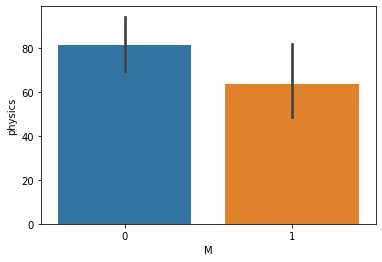

In [67]:
#lets see how many boys and girls perform in physics subject
sns.barplot(x='M',y='physics',data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

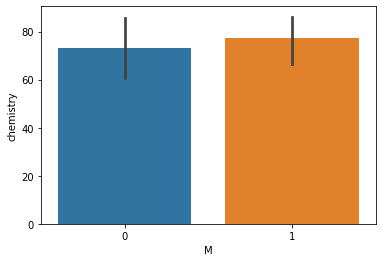

In [68]:
#lets see how many boys and girls perform in chemistry subject
sns.barplot(x='M',y='chemistry',data=df)
plt.show

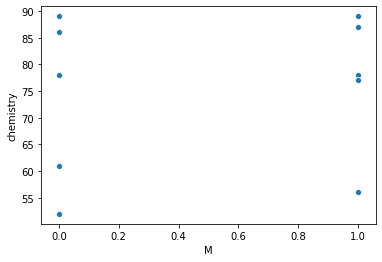

In [69]:
#by using scatter plot we can able to see how many students got the marks in chemistry
sns.scatterplot(x='M',y='chemistry',data=df)
plt.show()

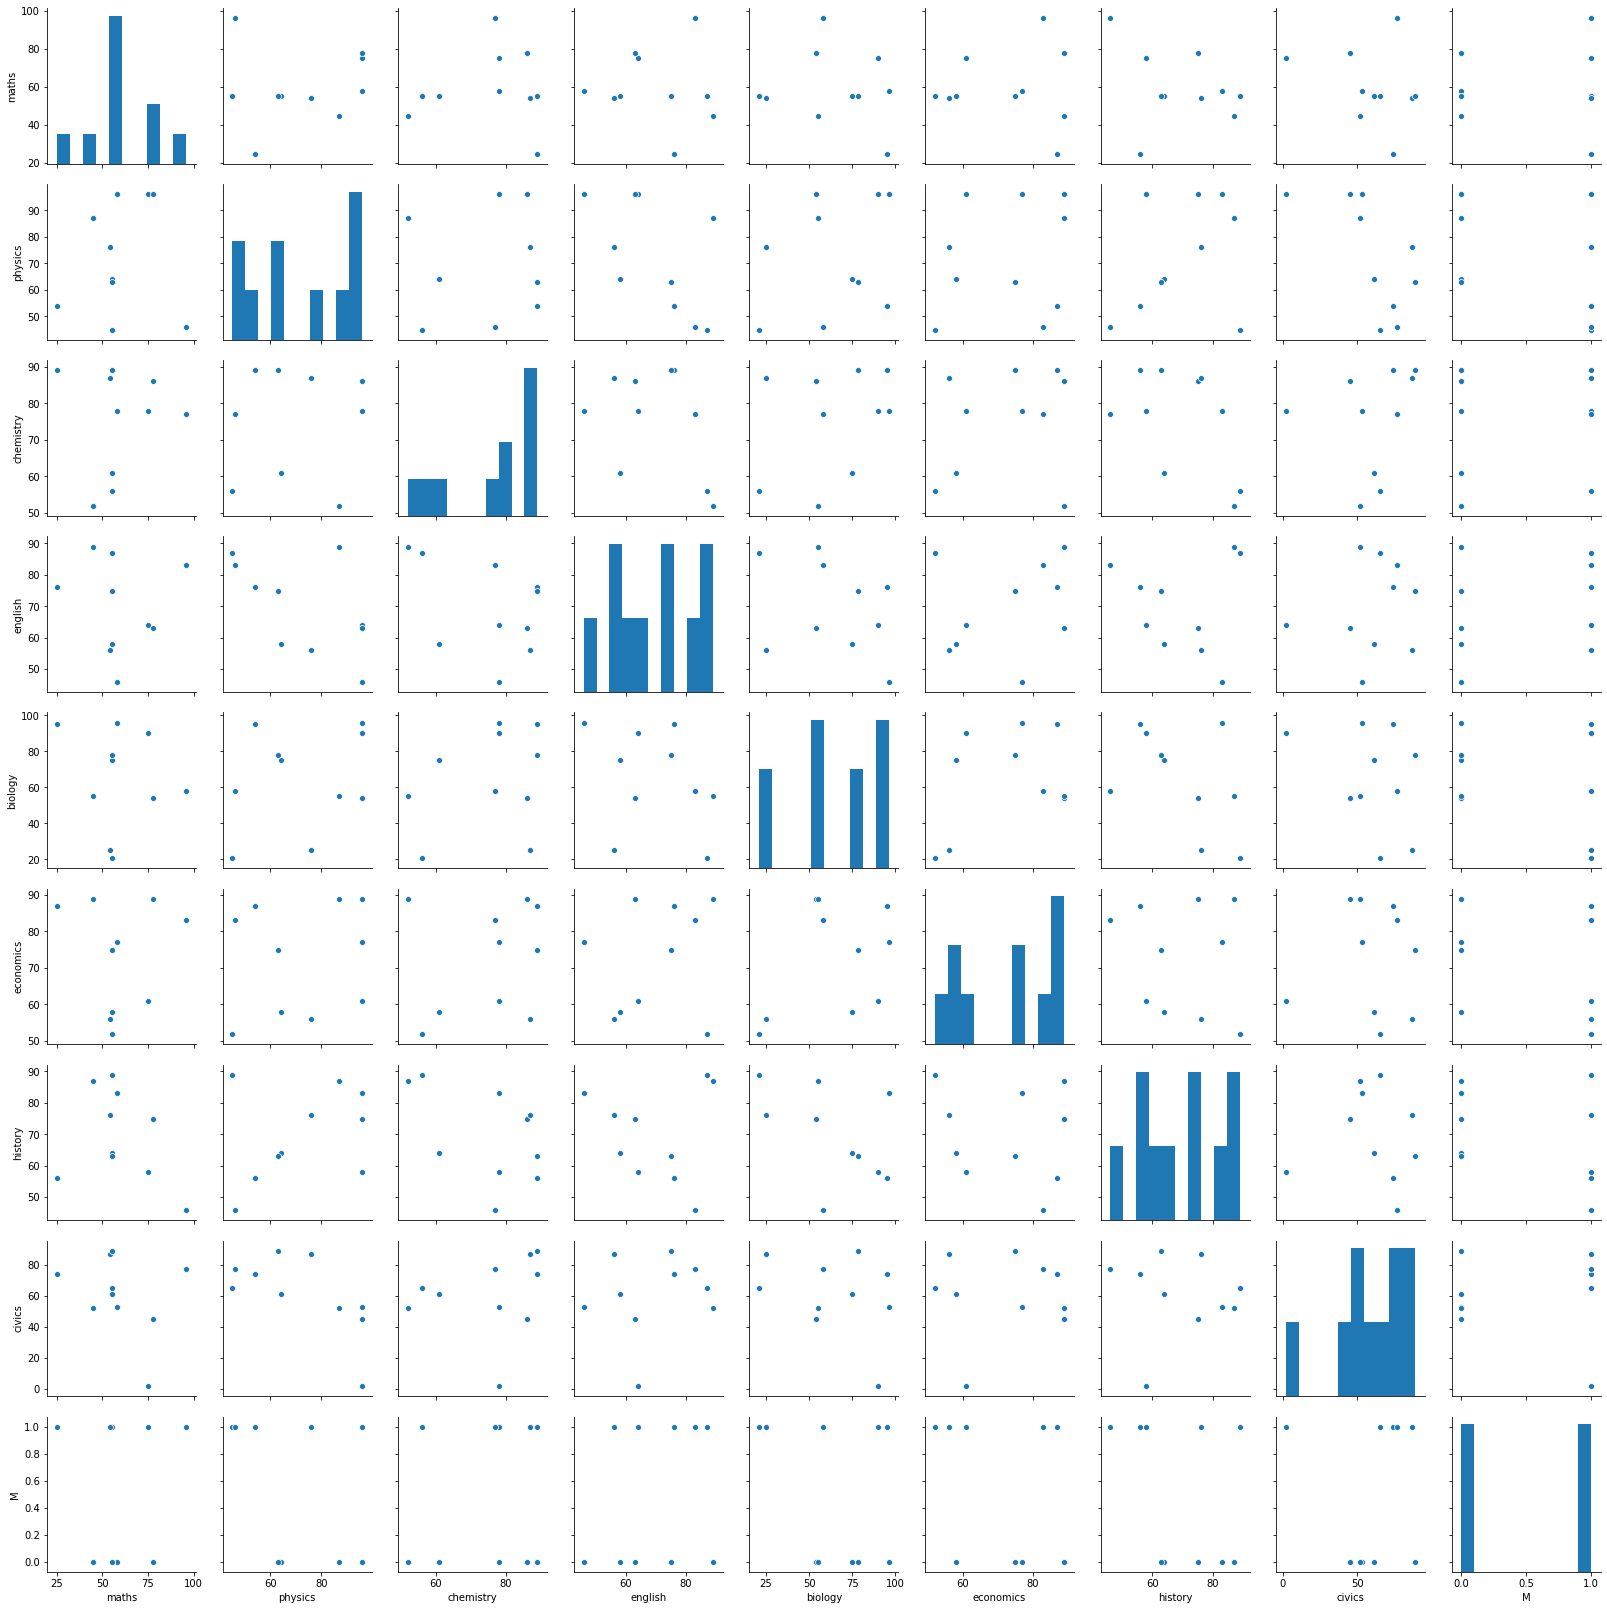

In [70]:
#lets analysis students with respect to all subjects
sns.pairplot(df)
plt.show()

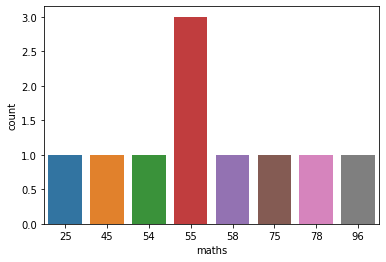

In [74]:
#lets check the number of counts in maths 
sns.countplot(x='maths',data=df)
plt.show()